**(SAND) GRU model -‘Open’, ‘EMA_7’**





In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout,Activation
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#sand = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
slp= 'https://raw.githubusercontent.com/loguansiang/fyp/main/SLP%20fyp.csv'
# mana = 'https://raw.githubusercontent.com/loguansiang/fyp/main/MANA%20fyp.csv'

df = pd.read_csv(slp)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-08,0.199600,0.200201,0.109705,0.110012,0.110012,8412
2020-07-09,0.110270,0.149273,0.062864,0.091263,0.091263,5864
2020-07-10,0.091247,0.104638,0.045408,0.055206,0.055206,302
2020-07-11,0.055206,0.089824,0.023832,0.033257,0.033257,380
2020-07-12,0.033253,0.033525,0.018149,0.018416,0.018416,42
...,...,...,...,...,...,...
2022-04-13,0.016956,0.017662,0.016659,0.017561,0.017561,195753852
2022-04-14,0.017563,0.018326,0.016753,0.017127,0.017127,214228125
2022-04-15,0.017128,0.017279,0.016853,0.017239,0.017239,107932100


In [5]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=d96498b4ca2b27c7a581c3d1236d9d1d8180f1adef869d36fc326345cb45bb67
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [6]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [7]:
df['Pre_Close'] = df['Close'].shift(+1)
df[('H-L')] = df['High'] - df['Low']
df[('0-C')]= df['Open'] - df['Close']
df['SMA_7'] = df.Close.rolling(7, min_periods=1).mean()
df['rsi_7']=ta.momentum.rsi(df.Close,window=7)
#df['MACD'] = ta.trend.macd_diff(df.Close)
df['EMA_7']= df['Close'].ewm(span=7).mean()
df = df.drop(columns=['Adj Close'])
df.dropna(inplace= True)
df

,Open,High,Low,Close,Volume,Pre_Close,H-L,0-C,SMA_7,rsi_7,EMA_7
Date,,,,,,,,,,,
2020-07-14,0.012000,0.076397,0.011938,0.034327,419,0.011982,0.064459,-0.022327,0.050638,27.681177,0.036470
2020-07-15,0.034318,0.034480,0.010670,0.010735,79,0.034327,0.023810,0.023583,0.036455,20.642657,0.029320
2020-07-16,0.010729,0.010755,0.009543,0.009627,35,0.010735,0.001212,0.001102,0.024793,20.359012,0.023997
2020-07-17,0.009628,0.009658,0.009562,0.009590,35,0.009627,0.000096,0.000038,0.018276,20.348119,0.020181
2020-07-18,0.009594,0.011825,0.009574,0.011774,42,0.009590,0.002251,-0.002180,0.015207,23.178636,0.017986
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,0.016956,0.017662,0.016659,0.017561,195753852,0.016955,0.001003,-0.000605,0.018427,37.914164,0.018445
2022-04-14,0.017563,0.018326,0.016753,0.017127,214228125,0.017561,0.001573,0.000436,0.017850,35.801746,0.018116
2022-04-15,0.017128,0.017279,0.016853,0.017239,107932100,0.017127,0.000426,-0.000111,0.017545,36.860883,0.017897


In [8]:
def data_prep(dataset, target, data_start, data_end, look_back, horizon):
    dataX,dataY = [],[]
    data_start = data_start + look_back
    if data_end is None:
        data_end = len(dataset) - horizon

    for i in range(data_start, data_end):
        a = range(i-look_back, i)
        dataX.append(dataset[a])

        b = range(i+1, i+1+horizon)
        dataY.append(target[b])
    return np.array(dataX), np.array(dataY)

In [9]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
# X_data = X_scaler.fit_transform(df[['Open', 'High', 'Low','Volume','H-L',	'0-C','SMA_7','rsi_7','EMA_7']])//experiment4
X_data = X_scaler.fit_transform(df[['Open','High','Low', 'Volume']])
Y_data = Y_scaler.fit_transform(df[['Close']])

##['Open', 'High', 'Low','Volume']
##['H-L',	'0-C','SMA_7','rsi_7','EMA_7']

In [10]:
##TRAIN_SPLIT = int(len(df) * 0.8)
look_back = 10
horizon = 10
train_split = int(len(df) * 0.8)
x_train, y_train = data_prep(X_data, Y_data, 0, train_split, look_back, horizon)
x_vali, y_vali = data_prep(X_data, Y_data, train_split, None, look_back, horizon)

In [11]:
# x_train

In [12]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[7.45657624e-03 1.63011433e-01 9.82835557e-03 8.08372041e-08]
 [7.04690218e-02 6.06282653e-02 5.86324107e-03 1.52413822e-08]
 [3.86804599e-03 2.67944594e-03 2.33904231e-03 6.75251108e-09]
 [7.59492241e-04 0.00000000e+00 2.39845648e-03 6.75251108e-09]
 [6.63496939e-04 5.29294380e-03 2.43598123e-03 8.10301330e-09]
 [6.81566643e-03 6.30170512e-03 9.03095479e-03 5.78786664e-10]
 [8.03254805e-03 6.35299807e-03 1.00753935e-02 5.78786664e-10]
 [7.69656450e-03 7.18101282e-03 1.02098571e-02 0.00000000e+00]
 [8.97838412e-03 9.30112136e-03 1.12980747e-02 2.89393332e-09]
 [1.14799087e-02 1.11061447e-02 1.42938000e-02 3.08686221e-09]]

 Target horizon

[[0.0345849 ]
 [0.035732  ]
 [0.04800906]
 [0.04678023]
 [0.01231652]
 [0.01026189]
 [0.0107692 ]
 [0.01726849]
 [0.02293917]
 [0.02313082]]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [14]:
batch_size = 32
buffer_size = 18

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [15]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from keras.layers.merge import concatenate
import tensorflow as tf

In [16]:
x_train.shape[-2:]

(10, 4)

In [17]:
#define model
import tensorflow as tf
from tensorflow.keras import layers
# Set random seed for as reproducible results as possible
tf.random.set_seed(7)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train.shape[-2:])))
cnn_model.add(Conv1D(filters=64, kernel_size=1))
cnn_model.add(MaxPooling1D(pool_size=(1)))
cnn_model.add(Conv1D(filters=128, kernel_size=1))
cnn_model.add(Flatten())
cnn_model.add(Dense(256,))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10))
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            160       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            2112      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 128)           8320      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                        

In [18]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
# tf.random.set_seed(7)

# lstm_model = Sequential()
# lstm_model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[-2:])))
# lstm_model.add(Dense(20,activation='linear'))
# lstm_model.add(LSTM(50))
# lstm_model.add(Dropout(0.2))
# lstm_model.add(Dense(units=horizon,activation='linear'))
# lstm_model.compile(loss='mean_squared_error', optimizer='adam')
# lstm_model.summary()


In [19]:
#model_path = 'CNN_Multivariate.h5'
#early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
#checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
#callbacks=[early_stopings,checkpoint]

In [20]:
history = cnn_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)
# history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)#callback
##history = cnn_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)

Epoch 1/50
100/100 [==============================] - 2s 8ms/step - loss: 0.0274 - val_loss: 0.0071
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0229 - val_loss: 0.0021
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0180 - val_loss: 0.0029
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0173 - val_loss: 0.0089
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0175 - val_loss: 0.0042
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0288 - val_loss: 0.0034
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0301 - val_loss: 0.0221
Epoch 8/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0189 - val_loss: 0.0010
Epoch 9/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0181 - val_loss: 0.0085
Epoch 10/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0160 - val_loss: 5.645

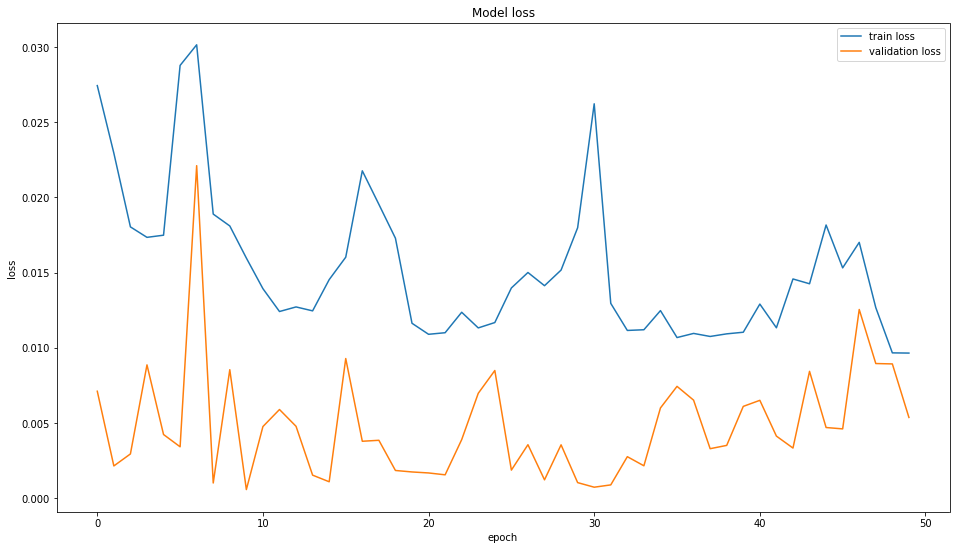

In [21]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Pre_Close', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'EMA_7'],
      dtype='object')

In [23]:

##['open']


data_val = X_scaler.fit_transform(df[['Open','High','Low', 'Volume']].tail(10))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred=cnn_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 0s 106ms/step


array([[ 0.03569606,  0.01760946,  0.0080298 ,  0.00333985,  0.00285604,
         0.00101938, -0.03361517, -0.02118354, -0.02226323, -0.02566094]],
      dtype=float32)

In [24]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')


In [25]:
validate = (df[['Close']].tail(10))
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.0008456385303068461
MAE is : 0.024336039694482836
RMSE is : 0.02907986468859245
MAPE is : 140.44307256681878


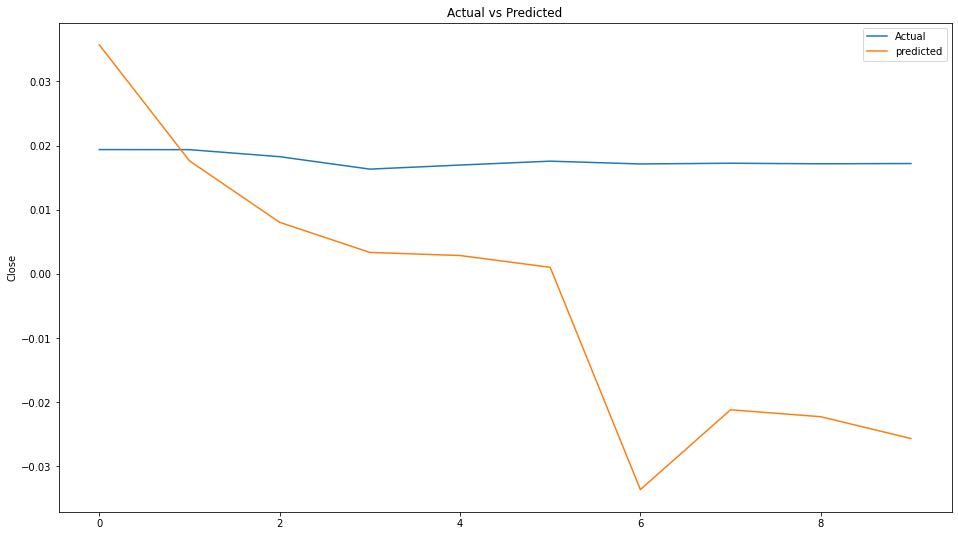

In [26]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()